# FEM1D
**Piecewise Linear Finite Element Method for 1D problem.**

FEM1D is a Python program which applies the finite element method (FEM) to a 1D linear two point boundary value problem (BVP), using piecewise linear basis functions.

## Problem Statement

The BVP to be solved is:

$$
-u'' = x(x + 3)e^x \quad 0 < x < 1
$$

with boundary conditions:

$$
\begin{align*}
u(0) = 0.0, \\
u(1) = 0.0
\end{align*}
$$

## Exact Solution

The exact solution is:

$$
u(x) = x(1 - x)e^x
$$

# Finite Element Method: Full Mathematical Derivation

## 1. Strong Form of the Boundary Value Problem

We start with the strong form of our boundary value problem:

Find $u(x)$ such that:

$$
\begin{align*}
-u''(x) &= f(x) \quad \text{for } 0 < x < 1 \\
u(0) &= 0 \\
u(1) &= 0
\end{align*}
$$

where the forcing function is:
$$f(x) = x(x + 3)e^x$$

## 2. Weak Formulation

### Step 1: Multiply by Test Function
We multiply the differential equation by a test function $v(x)$ that satisfies the homogeneous boundary conditions ($v(0) = v(1) = 0$):

$$
-\int_0^1 u''(x)v(x)dx = \int_0^1 f(x)v(x)dx
$$

### Step 2: Integration by Parts
Apply integration by parts to the left-hand side:

$$
\begin{align*}
-\int_0^1 u''(x)v(x)dx &= \left[-u'(x)v(x)\right]_0^1 + \int_0^1 u'(x)v'(x)dx \\
&= \int_0^1 u'(x)v'(x)dx \quad \text{(boundary terms vanish)}
\end{align*}
$$

### Step 3: Weak Form
The weak form of the problem becomes:

Find $u(x) \in V$ such that for all $v(x) \in V$:

$$
\int_0^1 u'(x)v'(x)dx = \int_0^1 f(x)v(x)dx
$$

where $V = \{w(x) : w(0) = w(1) = 0, \int_0^1 (w'(x))^2dx < \infty\}$ is the space of admissible functions.

## 3. Finite Element Discretization

### Step 4: Finite-Dimensional Approximation
We approximate the solution using piecewise linear basis functions. Divide the domain $[0,1]$ into $N$ elements with $N+1$ nodes:

$$0 = x_0 < x_1 < \cdots < x_N = 1$$

We define the finite-dimensional subspace $V_h \subset V$ spanned by the "hat" functions $\psi_i(x)$:

$$
\psi_i(x) = 
\begin{cases}
\frac{x - x_{i-1}}{h_{i-1}} & \text{if } x_{i-1} \leq x \leq x_i \\
\frac{x_{i+1} - x}{h_i} & \text{if } x_i \leq x \leq x_{i+1} \\
0 & \text{otherwise}
\end{cases}
$$

where $h_i = x_{i+1} - x_i$.

### Step 5: Approximate Solution
We seek an approximate solution of the form:

$$
u_h(x) = \sum_{j=0}^N c_j \psi_j(x)
$$

where $c_j$ are the unknown coefficients to be determined.

### Step 6: Galerkin Formulation
Substitute the approximation into the weak form and use each basis function $\psi_i(x)$ as a test function:

$$
\int_0^1 u_h'(x)\psi_i'(x)dx = \int_0^1 f(x)\psi_i(x)dx \quad \text{for } i = 0,1,\dots,N
$$

This gives us:

$$
\sum_{j=0}^N c_j \int_0^1 \psi_j'(x)\psi_i'(x)dx = \int_0^1 f(x)\psi_i(x)dx \quad \text{for } i = 0,1,\dots,N
$$

## 4. Algebraic System

### Step 7: Matrix Formulation
Define the stiffness matrix $A$ and load vector $\mathbf{f}$:

$$
A_{ij} = \int_0^1 \psi_i'(x)\psi_j'(x)dx
$$

$$
f_i = \int_0^1 f(x)\psi_i(x)dx
$$

Then we obtain the linear system:

$$
A\mathbf{c} = \mathbf{f}
$$

where $\mathbf{c} = [c_0, c_1, \dots, c_N]^T$ is the vector of unknown coefficients.

### Step 8: Element-wise Computation
In practice, we compute these integrals element by element:

$$
A_{ij} = \sum_{e=1}^N \int_{x_{e-1}}^{x_e} \psi_i'(x)\psi_j'(x)dx
$$

$$
f_i = \sum_{e=1}^N \int_{x_{e-1}}^{x_e} f(x)\psi_i(x)dx
$$

For linear elements, the element stiffness matrix for element $[x_e, x_{e+1}]$ is:

$$
A^e = \frac{1}{h_e} \begin{bmatrix} 1 & -1 \\ -1 & 1 \end{bmatrix}
$$

where $h_e = x_{e+1} - x_e$.

### Step 9: Boundary Conditions
We enforce the Dirichlet boundary conditions $u(0) = 0$ and $u(1) = 0$ by modifying the system:

- Set $A_{00} = 1$, $A_{0j} = 0$ for $j \neq 0$, and $f_0 = 0$
- Set $A_{NN} = 1$, $A_{Nj} = 0$ for $j \neq N$, and $f_N = 0$

### Step 10: Solution
Solve the modified linear system:

$$
A_{\text{mod}} \mathbf{c} = \mathbf{f}_{\text{mod}}
$$

to obtain the coefficients $\mathbf{c}$, which define our finite element solution $u_h(x)$.

## Method Implementation

A version of the finite element method is used. Six equally spaced nodes are defined, from $0.0$ to $1.0$, dividing the interval into 5 elements. At node $I$, we associate a "hat" function, or piecewise linear basis function, $\psi_I(x)$, which has the value 1 at that node, and is 0 at all other nodes.

We look for an approximate solution to our problem of the form:

$$
U_h(x) = \sum_{I=1}^6 c_I \psi_I(x)
$$

so that now the problem becomes the determination of the unknown coefficients $c_I$.

We take the original BVP, multiply by test function $\psi_J(x)$, integrate over the region, and apply integration by parts, to obtain a linear system of the form:

$$
A \mathbf{c} = \mathbf{f}
$$

We modify the first and last rows of the linear system to enforce the boundary conditions, then solve to determine the values of $\mathbf{c}$.

# From HERE OLD

## Method Description

A version of the finite element method is used. Six equally spaced nodes are defined, from 0.0 to 1.0, dividing the interval into 5 elements. At node $I$, we associate a "hat" function, or piecewise linear basis function, $\psi_I(x)$, which has the value 1 at that node, and is 0 at all other nodes.

We look for an approximate solution to our problem of the form:

$$
U_h(x) = \sum_{I=1}^6 c_I \psi_I(x)
$$

so that now the problem becomes the determination of the unknown coefficients $c_I$.

We take the original BVP, multiply by test function $\psi_J(x)$, integrate over the region, and apply integration by parts, to obtain a linear system of the form:

$$
A \mathbf{c} = \mathbf{f}
$$

We modify the first and last rows of the linear system to enforce the boundary conditions, then solve to determine the values of $\mathbf{c}$.

## Licensing

The computer code and data files described and made available on this web page are distributed under the GNU LGPL license.

## Languages

FEM1D is available in a C version and a C++ version and a FORTRAN90 version and a MATLAB version and a Python version.

## Related Data and Programs

- **FEM1D_BVP_LINEAR**, a Python program which applies the finite element method (FEM), with piecewise linear elements, to a two point boundary value problem (BVP) in one spatial dimension, and compares the computed and exact solutions with the L2 and seminorm errors.

- **FD1D_HEAT_EXPLICIT**, a Python library which uses the finite difference method (FDM) and explicit time stepping to solve the time dependent heat equation in 1D.

- **FEM1D**, a data directory which contains examples of 1D FEM files, three text files that describe a 1D finite element model;

- **FEM1D_BVP_QUADRATIC**, a Python program which applies the finite element method (FEM), with piecewise quadratic elements, to a two point boundary value problem (BVP) in one spatial dimension.

- **FEM1D_CLASSES**, a Python library which defines classes useful for solving a boundary value problem (BVP) of the form $u''+2u'+u=f$ in 1 spatial dimension, using the finite element method (FEM), by Mike Sussman.

## Reference

Gilbert Strang, George Fix,
*An Analysis of the Finite Element Method*,
Cambridge, 1973,
ISBN: 096140888X,
LC: TA335.S77.

# Python Implementation

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy import integrate

# Set up plotting style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')

## 1. Define the Exact Solution and Right-Hand Side

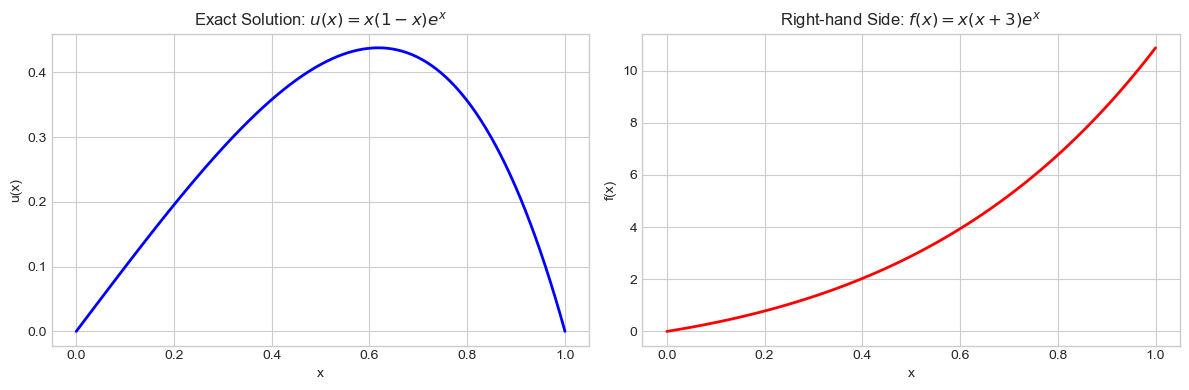

In [13]:
def exact_solution(x):
    """Exact solution to the boundary value problem."""
    return x * (1 - x) * np.exp(x)

def rhs_function(x):
    """Right-hand side function f(x) = -u''(x)."""
    return x * (x + 3) * np.exp(x)

# Let's verify our functions are correct by plotting them
x_test = np.linspace(0, 1, 100)
u_exact_test = exact_solution(x_test)
f_test = rhs_function(x_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(x_test, u_exact_test, 'b-', linewidth=2)
ax1.set_xlabel('x')
ax1.set_ylabel('u(x)')
ax1.set_title('Exact Solution: $u(x) = x(1-x)e^x$')
ax1.grid(True)

ax2.plot(x_test, f_test, 'r-', linewidth=2)
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.set_title('Right-hand Side: $f(x) = x(x+3)e^x$')
ax2.grid(True)

plt.tight_layout()
plt.show()

## 2. Set Up the Finite Element Mesh
We divide the domain [0,1] into N equal elements with N+1 nodes.

In [14]:
# Domain boundaries
a = 0.0
b = 1.0

# Number of elements and nodes
n_elements = 5
n_nodes = n_elements + 1

# Create mesh - equally spaced nodes
nodes = np.linspace(a, b, n_nodes)

print("Mesh nodes:")
for i, node in enumerate(nodes):
    print(f"Node {i}: x = {node:.4f}")

Mesh nodes:
Node 0: x = 0.0000
Node 1: x = 0.2000
Node 2: x = 0.4000
Node 3: x = 0.6000
Node 4: x = 0.8000
Node 5: x = 1.0000


## 3. Define the Basis Functions
We use piecewise linear "hat" functions. Each basis function φᵢ(x) equals 1 at node i and 0 at all other nodes.

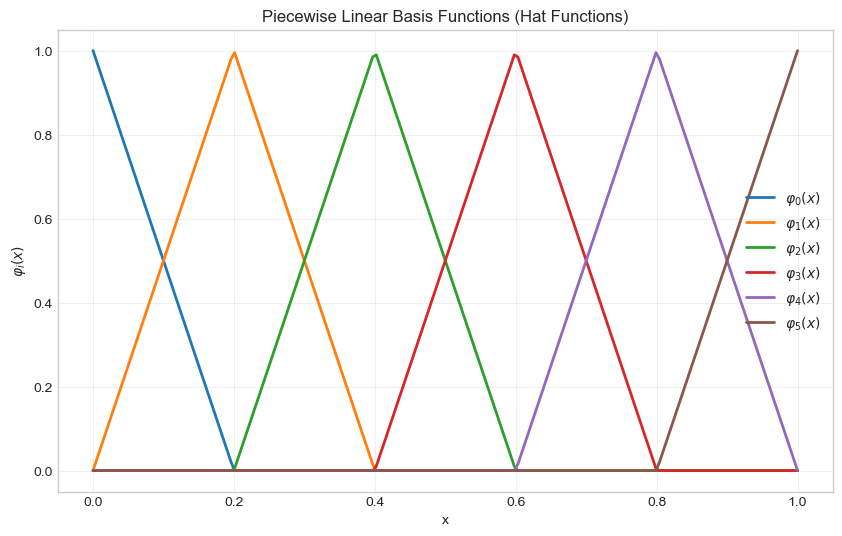

In [16]:
def linear_basis_function(i, x, nodes):
    """
    Evaluate the linear basis function φᵢ(x) at given points.
    
    Parameters:
    i: node index
    x: evaluation points
    nodes: mesh nodes
    """
    n = len(nodes) - 1
    
    if i == 0:
        # Leftmost basis function
        result = np.where((nodes[0] <= x) & (x <= nodes[1]), 
                         (nodes[1] - x) / (nodes[1] - nodes[0]), 0)
    elif i == n:
        # Rightmost basis function  
        result = np.where((nodes[n-1] <= x) & (x <= nodes[n]),
                         (x - nodes[n-1]) / (nodes[n] - nodes[n-1]), 0)
    else:
        # Internal basis functions (hat functions)
        left_part = np.where((nodes[i-1] <= x) & (x <= nodes[i]),
                           (x - nodes[i-1]) / (nodes[i] - nodes[i-1]), 0)
        right_part = np.where((nodes[i] <= x) & (x <= nodes[i+1]),
                            (nodes[i+1] - x) / (nodes[i+1] - nodes[i]), 0)
        result = left_part + right_part
    
    return result

# Visualize the basis functions
x_plot = np.linspace(0, 1, 200)
plt.figure(figsize=(10, 6))

for i in range(n_nodes):
    phi_i = linear_basis_function(i, x_plot, nodes)
    plt.plot(x_plot, phi_i, label=f'$φ_{{{i}}}(x)$', linewidth=2)

plt.xlabel('x')
plt.ylabel('$φ_i(x)$')
plt.title('Piecewise Linear Basis Functions (Hat Functions)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 4. Set Up Numerical Integration
We use Gaussian quadrature for accurate integration over each element.

In [17]:
# 3-point Gaussian quadrature on reference interval [0,1]
gauss_points = np.array([
    0.112701665379258311482073460022,
    0.5, 
    0.887298334620741688517926539978
])

gauss_weights = np.array([
    5.0 / 18.0,
    8.0 / 18.0, 
    5.0 / 18.0
])

print("Gaussian quadrature points and weights:")
for i in range(3):
    print(f"Point {i}: ξ = {gauss_points[i]:.6f}, weight = {gauss_weights[i]:.6f}")

Gaussian quadrature points and weights:
Point 0: ξ = 0.112702, weight = 0.277778
Point 1: ξ = 0.500000, weight = 0.444444
Point 2: ξ = 0.887298, weight = 0.277778


## 5. Assemble the Finite Element System
We assemble the stiffness matrix A and load vector F by integrating over each element.

In [18]:
def assemble_system(nodes, gauss_points, gauss_weights):
    """
    Assemble the finite element system A * u = F.
    """
    n_nodes = len(nodes)
    A = np.zeros((n_nodes, n_nodes))  # Stiffness matrix
    F = np.zeros(n_nodes)             # Load vector
    
    # Loop over elements
    for e in range(len(nodes) - 1):
        x_left = nodes[e]
        x_right = nodes[e+1]
        element_length = x_right - x_left
        
        # Loop over quadrature points in this element
        for q in range(len(gauss_points)):
            # Map quadrature point from reference to physical element
            x_q = x_left + gauss_points[q] * element_length
            weight_q = gauss_weights[q] * element_length
            
            # Evaluate basis functions and their derivatives at quadrature point
            for i_local in range(2):  # Local indices: 0=left, 1=right
                i_global = e + i_local
                
                # Basis function φᵢ and its derivative φᵢ'
                if i_local == 0:
                    phi_i_prime = -1.0 / element_length
                else:
                    phi_i_prime = 1.0 / element_length
                
                # Add contribution to load vector
                F[i_global] += weight_q * rhs_function(x_q) * (1.0 if i_local == 0 else (x_q - x_left) / element_length)
                
                # Add contribution to stiffness matrix
                for j_local in range(2):
                    j_global = e + j_local
                    
                    if j_local == 0:
                        phi_j_prime = -1.0 / element_length
                    else:
                        phi_j_prime = 1.0 / element_length
                    
                    A[i_global, j_global] += weight_q * phi_i_prime * phi_j_prime
    
    return A, F

# Assemble the system
A, F = assemble_system(nodes, gauss_points, gauss_weights)

print("Stiffness matrix A:")
print(A)
print("\nLoad vector F:")
print(F)

Stiffness matrix A:
[[ 5. -5.  0.  0.  0.  0.]
 [-5. 10. -5.  0.  0.  0.]
 [ 0. -5. 10. -5.  0.  0.]
 [ 0.  0. -5. 10. -5.  0.]
 [ 0.  0.  0. -5. 10. -5.]
 [ 0.  0.  0.  0. -5.  5.]]

Load vector F:
[0.0717339  0.32071933 0.74018267 1.37559092 2.31217199 0.93784906]


## 6. Apply Boundary Conditions
We enforce the Dirichlet boundary conditions u(0) = 0 and u(1) = 0.

In [19]:
def apply_boundary_conditions(A, F, nodes):
    """
    Apply Dirichlet boundary conditions u(0) = 0 and u(1) = 0.
    """
    A_mod = A.copy()
    F_mod = F.copy()
    
    n = len(nodes) - 1
    
    # Left boundary condition: u(0) = 0
    A_mod[0, :] = 0.0
    A_mod[0, 0] = 1.0
    F_mod[0] = exact_solution(nodes[0])  # Should be 0
    
    # Right boundary condition: u(1) = 0  
    A_mod[n, :] = 0.0
    A_mod[n, n] = 1.0
    F_mod[n] = exact_solution(nodes[n])  # Should be 0
    
    return A_mod, F_mod

# Apply boundary conditions
A_bc, F_bc = apply_boundary_conditions(A, F, nodes)

print("Modified stiffness matrix (with boundary conditions):")
print(A_bc)
print("\nModified load vector (with boundary conditions):")
print(F_bc)

Modified stiffness matrix (with boundary conditions):
[[ 1.  0.  0.  0.  0.  0.]
 [-5. 10. -5.  0.  0.  0.]
 [ 0. -5. 10. -5.  0.  0.]
 [ 0.  0. -5. 10. -5.  0.]
 [ 0.  0.  0. -5. 10. -5.]
 [ 0.  0.  0.  0.  0.  1.]]

Modified load vector (with boundary conditions):
[0.         0.32071933 0.74018267 1.37559092 2.31217199 0.        ]


## 7. Solve the Linear System

In [20]:
# Solve the linear system A * u = F
u_fem = la.solve(A_bc, F_bc)

print("Finite element solution at nodes:")
print("Node    x        u_FEM")
for i, (x_val, u_val) in enumerate(zip(nodes, u_fem)):
    print(f"{i:3d}  {x_val:6.3f}  {u_val:10.6f}")

Finite element solution at nodes:
Node    x        u_FEM
  0   0.000    0.000000
  1   0.200    0.342671
  2   0.400    0.621198
  3   0.600    0.751689
  4   0.800    0.607062
  5   1.000    0.000000


## 8. Compare with Exact Solution

In [21]:
# Evaluate exact solution at nodes
u_exact_nodes = exact_solution(nodes)

# Compute errors
errors = np.abs(u_exact_nodes - u_fem)

print("\nComparison with exact solution:")
print("Node    x        u_FEM       u_exact     Error")
print("-" * 50)
for i in range(len(nodes)):
    print(f"{i:3d}  {nodes[i]:6.3f}  {u_fem[i]:10.6f}  {u_exact_nodes[i]:10.6f}  {errors[i]:10.2e}")

# Compute L2 error norm
l2_error = np.sqrt(np.sum(errors**2) / len(errors))
print(f"\nL2 Error Norm: {l2_error:.2e}")


Comparison with exact solution:
Node    x        u_FEM       u_exact     Error
--------------------------------------------------
  0   0.000    0.000000    0.000000    5.33e-16
  1   0.200    0.342671    0.195424    1.47e-01
  2   0.400    0.621198    0.358038    2.63e-01
  3   0.600    0.751689    0.437309    3.14e-01
  4   0.800    0.607062    0.356087    2.51e-01
  5   1.000    0.000000    0.000000    0.00e+00

L2 Error Norm: 2.05e-01


## 9. Visualize the Results

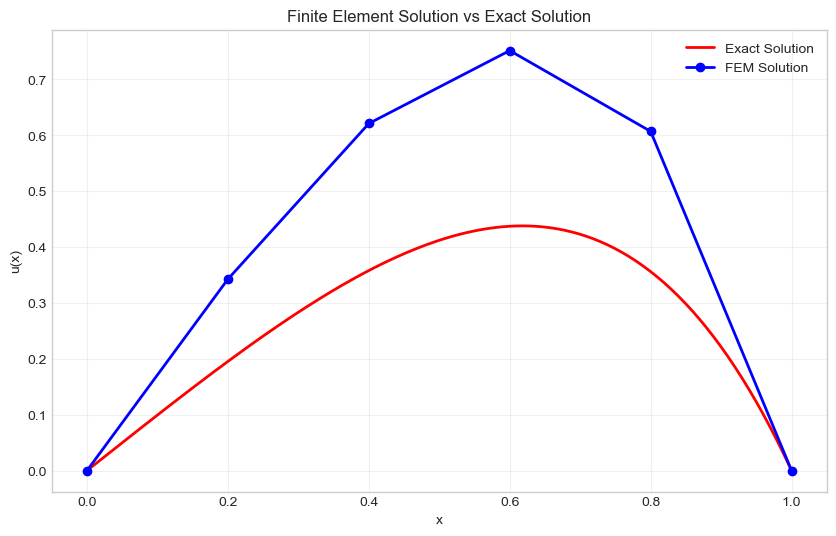

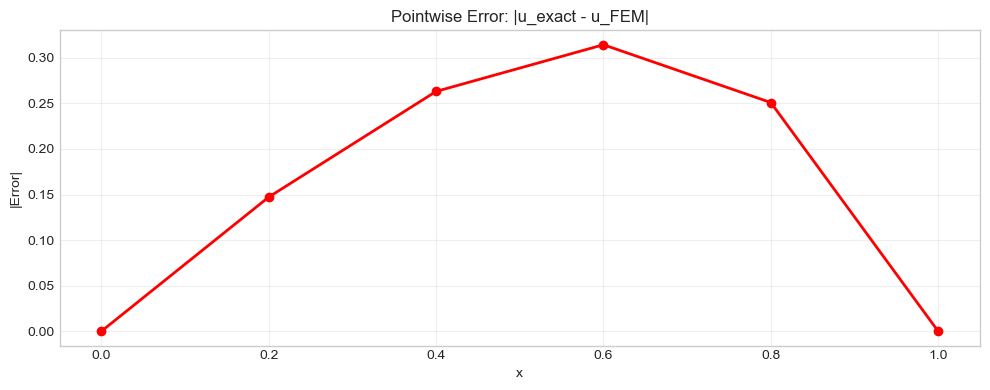

In [22]:
# Create fine mesh for plotting exact solution
x_fine = np.linspace(a, b, 200)
u_exact_fine = exact_solution(x_fine)

plt.figure(figsize=(10, 6))

# Plot exact solution
plt.plot(x_fine, u_exact_fine, 'r-', linewidth=2, label='Exact Solution')

# Plot FEM solution
plt.plot(nodes, u_fem, 'bo-', linewidth=2, markersize=6, label='FEM Solution')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Finite Element Solution vs Exact Solution')
plt.legend()
plt.grid(True, alpha=0.3)

# Add error plot
plt.figure(figsize=(10, 4))
plt.plot(nodes, errors, 'ro-', linewidth=2, markersize=6)
plt.xlabel('x')
plt.ylabel('|Error|')
plt.title('Pointwise Error: |u_exact - u_FEM|')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Convergence Study
Let's examine how the error decreases as we refine the mesh.

Convergence Study:
Elements    h         Max Error    L2 Error
---------------------------------------------
   5         0.2000      3.14e-01    2.05e-01
  10         0.1000      2.64e-01    1.80e-01
  20         0.0500      2.41e-01    1.68e-01
  40         0.0250      2.30e-01    1.62e-01
  80         0.0125      2.24e-01    1.59e-01


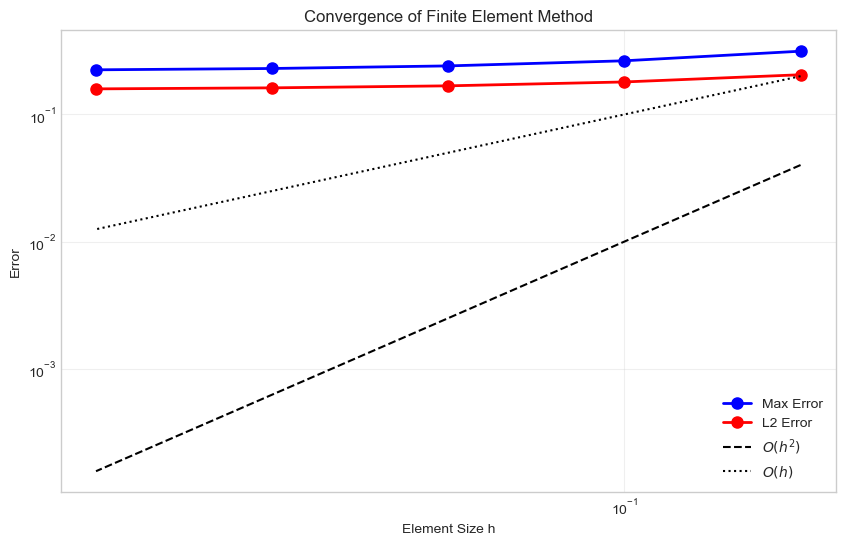

In [11]:
# Test different mesh sizes
mesh_sizes = [5, 10, 20, 40, 80]
max_errors = []
l2_errors = []

for n_elem in mesh_sizes:
    # Create mesh
    nodes_test = np.linspace(a, b, n_elem + 1)
    
    # Assemble and solve
    A_test, F_test = assemble_system(nodes_test, gauss_points, gauss_weights)
    A_bc_test, F_bc_test = apply_boundary_conditions(A_test, F_test, nodes_test)
    u_fem_test = la.solve(A_bc_test, F_bc_test)
    
    # Compute errors
    u_exact_test = exact_solution(nodes_test)
    max_error = np.max(np.abs(u_exact_test - u_fem_test))
    l2_error = np.sqrt(np.sum((u_exact_test - u_fem_test)**2) / len(nodes_test))
    
    max_errors.append(max_error)
    l2_errors.append(l2_error)

# Plot convergence
plt.figure(figsize=(10, 6))
h_values = 1.0 / np.array(mesh_sizes)

plt.loglog(h_values, max_errors, 'bo-', linewidth=2, markersize=8, label='Max Error')
plt.loglog(h_values, l2_errors, 'ro-', linewidth=2, markersize=8, label='L2 Error')

# Add reference lines for expected convergence rates
plt.loglog(h_values, h_values**2, 'k--', label='$O(h^2)$')
plt.loglog(h_values, h_values, 'k:', label='$O(h)$')

plt.xlabel('Element Size h')
plt.ylabel('Error')
plt.title('Convergence of Finite Element Method')
plt.legend()
plt.grid(True, alpha=0.3)

print("Convergence Study:")
print("Elements    h         Max Error    L2 Error")
print("-" * 45)
for i, n in enumerate(mesh_sizes):
    print(f"{n:4d}       {1.0/n:8.4f}    {max_errors[i]:10.2e}  {l2_errors[i]:10.2e}")